In [2]:
from google.colab import files

# Prompt the user to select files to upload
uploaded_files = files.upload()

Saving Assignment_Dataset.xlsx to Assignment_Dataset.xlsx


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel("Assignment_Dataset.xlsx")

In [4]:
df.head()

,Date,Year,GHI,PR
0,2019-07-01,2019,3.26,69.58
1,2019-07-02,2019,3.98,79.31
2,2019-07-03,2019,2.81,61.02
3,2019-07-04,2019,3.66,83.26
4,2019-07-05,2019,5.59,82.12


In [31]:
import matplotlib.pyplot as plt

df['Moving_Average'] = df['PR'].rolling(window=30).mean()
initial_budget = df['PR'].iloc[0]
budget_values = [initial_budget * (0.992 ** (year - 2019)) for year in df['Year']]  # Calculate the budget values
df['Budget'] = budget_values
no_points_below = sum(df['PR'] < budget_values)
no_points_above = 983 - no_points_below

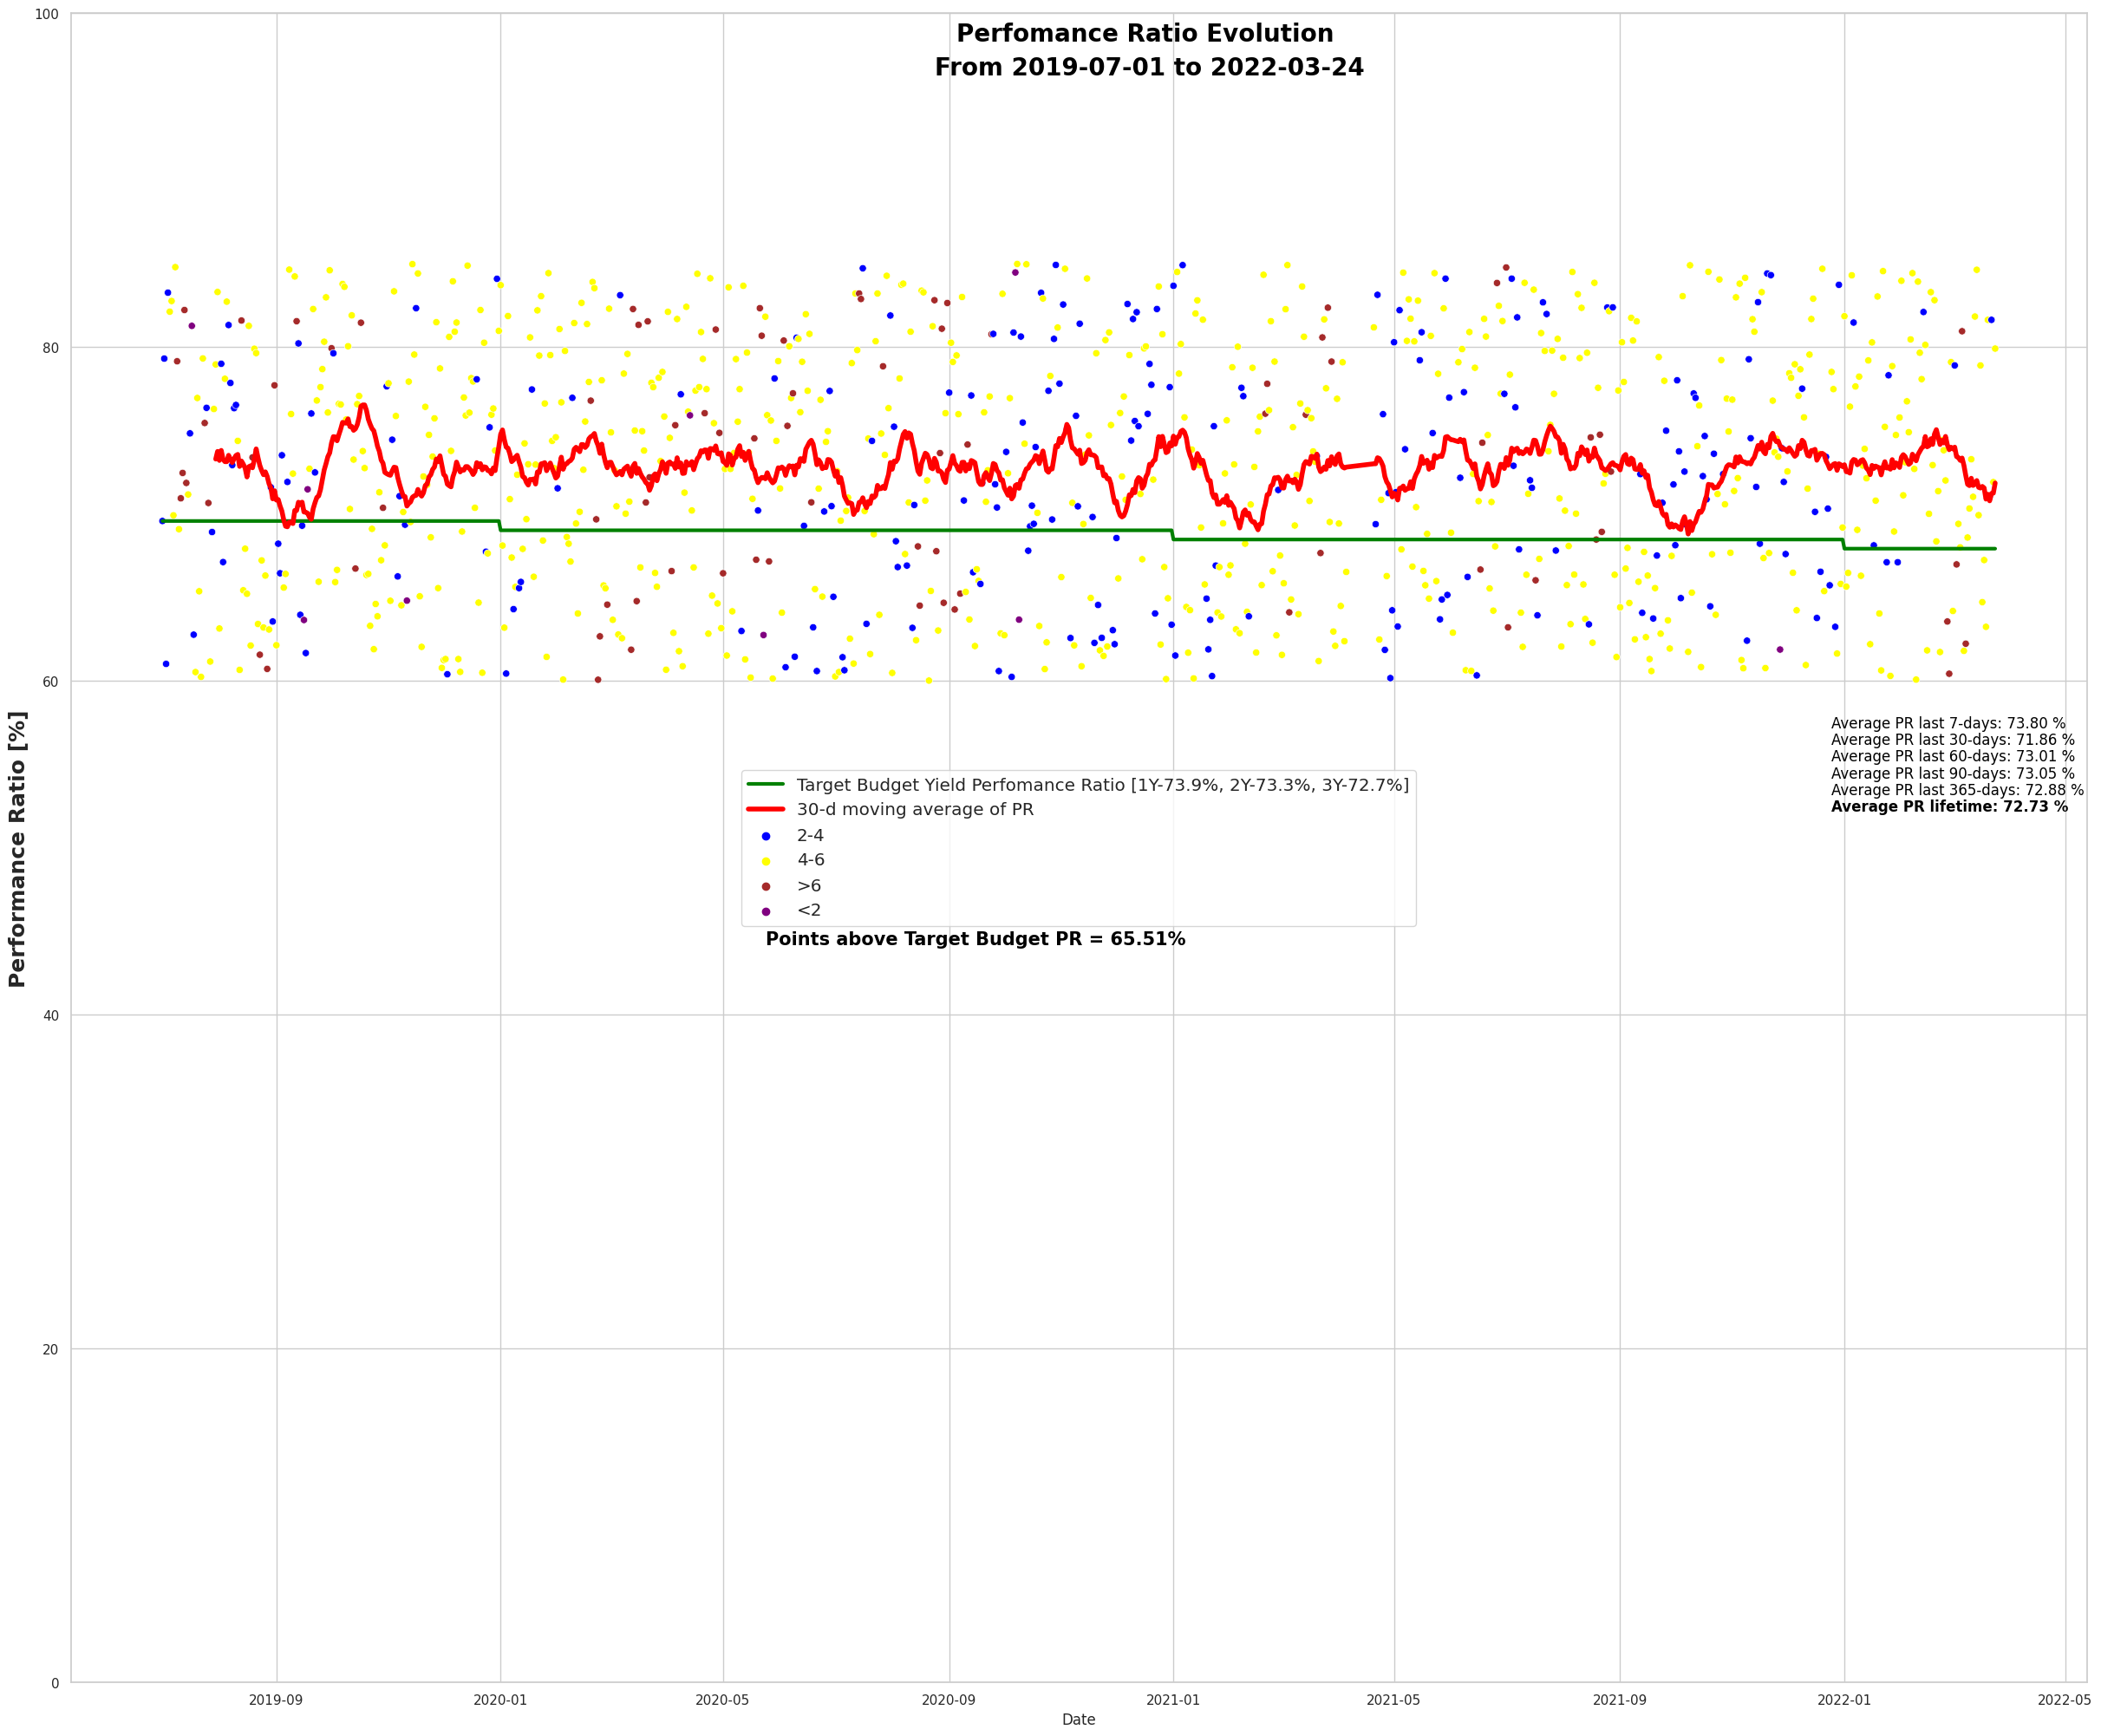

In [41]:
plt.figure(figsize=(30, 25))
sns.set(style='whitegrid')
sns.lineplot(x='Date', y='Budget', color = 'green', linewidth=3, data = df, label = "Target Budget Yield Perfomance Ratio [1Y-73.9%, 2Y-73.3%, 3Y-72.7%]")
sns.lineplot(data=df, x='Date', y='Moving_Average', color = 'red', linewidth=4, label = "30-d moving average of PR")
hue_map = {'<2': 'purple', '2-4': 'blue', '4-6': 'yellow' ,'>6': 'brown'}
categories = []
for value in df['GHI']:
    if value < 2:
        categories.append('<2')
    elif value >= 2 and value < 4:
        categories.append('2-4')
    elif value >= 4 and value < 6:
        categories.append('4-6')
    else:
        categories.append('>6')
sns.scatterplot(x="Date", y="PR", data = df, hue=categories, palette=hue_map)
# Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'])
# Calculate average PR for different periods

df['7-day Avg PR'] = df['PR'].rolling(window=7, min_periods=1).mean()
df['30-day Avg PR'] = df['PR'].rolling(window=30, min_periods=1).mean()
df['60-day Avg PR'] = df['PR'].rolling(window=60, min_periods=1).mean()
df['90-day Avg PR'] = df['PR'].rolling(window=90, min_periods=1).mean()
df['365-day Avg PR'] = df['PR'].rolling(window=365, min_periods=1).mean()
df['lifetime Avg PR'] = df['PR'].expanding().mean()

plt.text(df['Date'].iloc[-90], 57, f"Average PR last 7-days: {df['7-day Avg PR'].iloc[-1]:.2f} %",
         ha='left', va='bottom', color='black')
plt.text(df['Date'].iloc[-90], 56, f"Average PR last 30-days: {df['30-day Avg PR'].iloc[-1]:.2f} %",
         ha='left', va='bottom', color='black')
plt.text(df['Date'].iloc[-90], 55, f"Average PR last 60-days: {df['60-day Avg PR'].iloc[-1]:.2f} %",
         ha='left', va='bottom', color='black')
plt.text(df['Date'].iloc[-90], 54, f"Average PR last 90-days: {df['90-day Avg PR'].iloc[-1]:.2f} %",
         ha='left', va='bottom', color='black')
plt.text(df['Date'].iloc[-90], 53, f"Average PR last 365-days: {df['365-day Avg PR'].iloc[-1]:.2f} %",
         ha='left', va='bottom', color='black')
plt.text(df['Date'].iloc[-90], 52, f"Average PR lifetime: {df['lifetime Avg PR'].iloc[-1]:.2f} %",
         ha='left', weight='bold', va='bottom', color='black')
plt.text(df['Date'].iloc[-550], 98, "Perfomance Ratio Evolution", ha='left', weight='bold', va='bottom', color='black', fontsize=20)
plt.text(df['Date'].iloc[-562], 96, "From 2019-07-01 to 2022-03-24", ha='left', weight='bold', va='bottom', color='black', fontsize=20)
plt.text(df['Date'].iloc[-654], 44, f"Points above Target Budget PR = {no_points_above/983*100:.2f}%", weight='bold', va='bottom', color='black', fontsize=15)


# Enable grid lines
plt.ylim(0, 100)
plt.legend(loc='center', fontsize='large')
plt.grid(True)
plt.ylabel('Performance Ratio [%]', fontdict={'size': 18, 'weight': 'bold'})

# Show the plot
plt.show()